In [2]:
from qmr_exchange import Exchange

In [3]:
# Create a new exchange instance with a few assets
e = Exchange()
e.create_asset('ASSET1')
e.create_asset('ASSET2')

In [4]:

# get the current state of the order book (instantiation creates a buy and sell order)
ob = e.get_order_book('ASSET1')
ob.df

{'bids':    ticker  price  qty    creator                         dt
 0  ASSET1   99.0    1  init_seed 2022-09-13 14:48:09.997909,
 'asks':    ticker  price  qty    creator                         dt
 0  ASSET1  101.0    1  init_seed 2022-09-13 14:48:09.997909}

In [5]:
# LIMIT SELL ORDER HAS A HIGER PRICE THAN THE BEST BID, SO WE AUTOMATICALLY SELL THE MAX POSSIBLE AMOUNT
# AND ONLY CREATE A LIMIT ORDER FOR THE REMAINING QUANTITY
e.limit_sell('ASSET1', 98, 3, 'martin')
ob = e.get_order_book('ASSET1')
ob.df


{'bids': Empty DataFrame
 Columns: []
 Index: [],
 'asks':    ticker  price  qty    creator                         dt
 0  ASSET1   98.0    2     martin 2022-09-13 14:48:12.032687
 1  ASSET1  101.0    1  init_seed 2022-09-13 14:48:09.997909}

In [6]:
e.get_latest_trade('ASSET1')

<Trade: ASSET1 1@99.0 2022-09-13 14:48:12.032687>

In [8]:
import random
from tqdm import tqdm
import time
from qmr_exchange import Exchange
e = Exchange()
e.create_asset('AAPL')
for i in tqdm(range(10000),miniters=10):
    e.limit_sell('AAPL',e.get_latest_trade('AAPL').price + random.uniform(0, 1),1,creator='market_maker')
    e.limit_buy('AAPL',e.get_latest_trade('AAPL').price - random.uniform(0, 1),1,creator='market_maker')
    
    if random.choice([True, False]):
        e.market_buy('AAPL',1,'taker')
    else:
        e.market_sell('AAPL',1,'taker')
    # time.sleep(.0001)

100%|██████████| 10000/10000 [00:15<00:00, 645.87it/s]


In [10]:
trades = e.get_trades('AAPL')

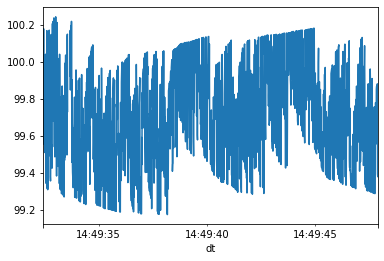

In [14]:
resample_LTP = trades['price'].resample('10ms').ohlc(_method='ohlc')
resample_LTP['close'].plot()


In [13]:
e.get_order_book('AAPL').df['bids']

,ticker,price,qty,creator,dt
0,AAPL,100.136789,1,market_maker,2022-09-10 19:22:00.017433
1,AAPL,100.135171,1,market_maker,2022-09-10 19:22:00.032433
2,AAPL,100.132659,1,market_maker,2022-09-10 19:21:59.720658
3,AAPL,100.084862,1,market_maker,2022-09-10 19:21:59.859723
4,AAPL,100.060811,1,market_maker,2022-09-10 19:21:59.672609
...,...,...,...,...,...
771,AAPL,98.694220,1,market_maker,2022-09-10 19:21:41.597162
772,AAPL,98.687556,1,market_maker,2022-09-10 19:21:38.681632
773,AAPL,98.653772,1,market_maker,2022-09-10 19:21:39.358780
774,AAPL,98.617239,1,market_maker,2022-09-10 19:21:38.696629


In [14]:
e.get_order_book('AAPL').df['asks']

,ticker,price,qty,creator,dt
0,AAPL,100.762353,1,market_maker,2022-09-10 19:22:00.094252
1,AAPL,100.783148,1,market_maker,2022-09-10 19:22:00.124253
2,AAPL,100.833589,1,market_maker,2022-09-10 19:21:59.797193
3,AAPL,100.841696,1,market_maker,2022-09-10 19:21:37.443080
4,AAPL,100.843781,1,market_maker,2022-09-10 19:21:52.400613
...,...,...,...,...,...
734,AAPL,101.782526,1,market_maker,2022-09-10 19:21:59.891769
735,AAPL,101.793222,1,market_maker,2022-09-10 19:21:57.086389
736,AAPL,101.794840,1,market_maker,2022-09-10 19:21:36.508244
737,AAPL,101.821291,1,market_maker,2022-09-10 19:21:57.650922
